# Problem Statement
SyriaTel is interested in identifying patterns that contribute to customer churn, so they can take action (e.g., offer special deals, improve customer service) to prevent customers from leaving

In [1]:
#importing neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loarding data
df=pd.read_csv('D:\MORINGA SCHOOL\phase 3 _project\SyriaTel-Churn-Prediction\data.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


DATA UNDERSTANDING

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [5]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])

state
['KS' 'OH' 'NJ' 'OK' 'AL']
account length
[128 107 137  84  75]
area code
[415 408 510]
phone number
['382-4657' '371-7191' '358-1921' '375-9999' '330-6626']
international plan
['no' 'yes']
voice mail plan
['yes' 'no']
number vmail messages
[25 26  0 24 37]
total day minutes
[265.1 161.6 243.4 299.4 166.7]
total day calls
[110 123 114  71 113]
total day charge
[45.07 27.47 41.38 50.9  28.34]
total eve minutes
[197.4 195.5 121.2  61.9 148.3]
total eve calls
[ 99 103 110  88 122]
total eve charge
[16.78 16.62 10.3   5.26 12.61]
total night minutes
[244.7 254.4 162.6 196.9 186.9]
total night calls
[ 91 103 104  89 121]
total night charge
[11.01 11.45  7.32  8.86  8.41]
total intl minutes
[10.  13.7 12.2  6.6 10.1]
total intl calls
[3 5 7 6 4]
total intl charge
[2.7  3.7  3.29 1.78 2.73]
customer service calls
[1 0 2 3 4]
churn
[False  True]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
# CHECKING MISSING
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [9]:
correlations = df.corr()['churn'].sort_values(ascending=False)
correlations

churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn, dtype: float64

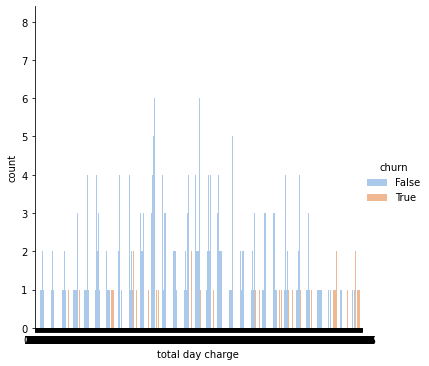

In [10]:
sns.catplot(data=df,kind='count',x='total day charge',hue='churn',palette='pastel')

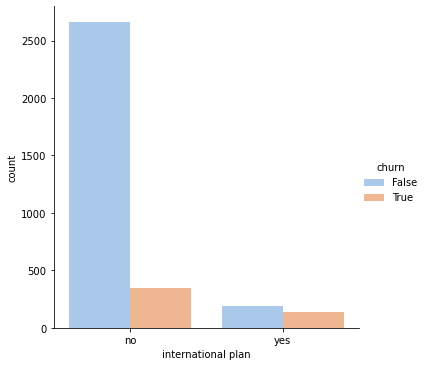

In [11]:
sns.catplot(data=df,kind='count',x='international plan',hue='churn',palette='pastel')

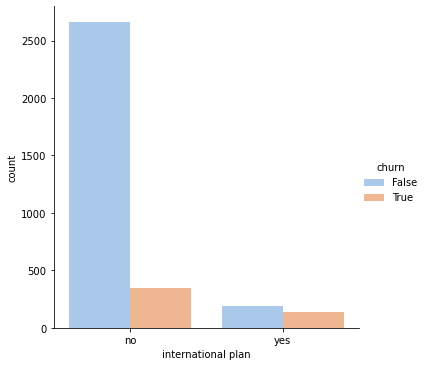

In [12]:
sns.catplot(data=df,kind='count',x='international plan',hue='churn',palette='pastel')

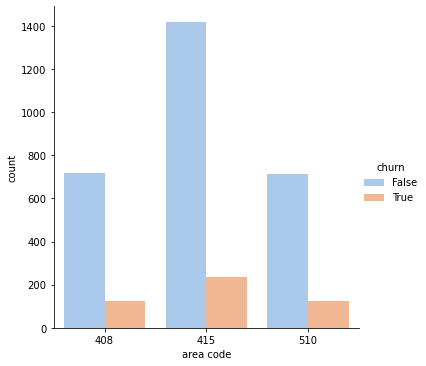

In [13]:
sns.catplot(data=df,kind='count',x='area code',hue='churn',palette='pastel')

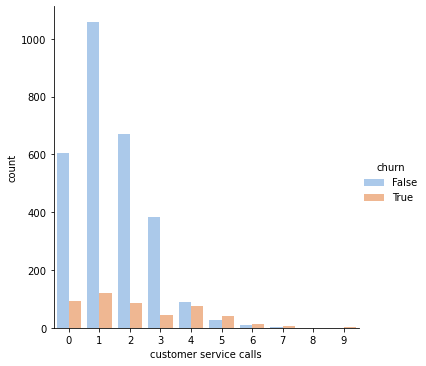

In [14]:
sns.catplot(data=df,kind='count',x='customer service calls',hue='churn',palette='pastel')

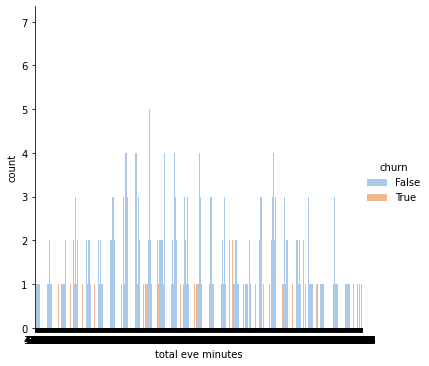

In [15]:
sns.catplot(data=df,kind='count',x='total eve minutes',hue='churn',palette='pastel')

# Types of variables

In this area, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type float64.

In [16]:
#find categorical columns.
categorical = df.select_dtypes(include=['object']).columns
categorical

Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')

In [17]:
#view categorical columns
df[categorical].head()


,state,phone number,international plan,voice mail plan
0,KS,382-4657,no,yes
1,OH,371-7191,no,yes
2,NJ,358-1921,no,no
3,OH,375-9999,yes,no
4,OK,330-6626,yes,no


# Summary of categorical variables
There is a date variable. It is denoted by phone number  column.

There are 4 categorical variables. These are given by state, phone number, international plan, voice mail plan.

There are two binary categorical variables - international plan & voice mail plan


# Examine more problems categorical variables

# checking missing values in categorical variables 

In [18]:
# There is no missing value
df[categorical].isnull().sum

<bound method DataFrame.sum of       state  phone number  international plan  voice mail plan
0     False         False               False            False
1     False         False               False            False
2     False         False               False            False
3     False         False               False            False
4     False         False               False            False
...     ...           ...                 ...              ...
3328  False         False               False            False
3329  False         False               False            False
3330  False         False               False            False
3331  False         False               False            False
3332  False         False               False            False

[3333 rows x 4 columns]>

# Checking the frequency of categorical variabls

In [19]:
df[categorical].value_counts()

state  phone number  international plan  voice mail plan
WY     422-8344      no                  no                 1
MD     384-3299      yes                 no                 1
LA     382-7659      no                  yes                1
       382-6153      no                  no                 1
       382-4024      no                  no                 1
                                                           ..
OH     336-7600      no                  no                 1
       336-5661      no                  no                 1
       329-8056      no                  yes                1
       328-8747      no                  no                 1
AK     330-5462      no                  no                 1
Length: 3333, dtype: int64

In [20]:
# viewing the frequency distribution of categorical variables.
print(df[categorical].value_counts()/np.float(len(df)))

state  phone number  international plan  voice mail plan
WY     422-8344      no                  no                 0.0003
MD     384-3299      yes                 no                 0.0003
LA     382-7659      no                  yes                0.0003
       382-6153      no                  no                 0.0003
       382-4024      no                  no                 0.0003
                                                             ...  
OH     336-7600      no                  no                 0.0003
       336-5661      no                  no                 0.0003
       329-8056      no                  yes                0.0003
       328-8747      no                  no                 0.0003
AK     330-5462      no                  no                 0.0003
Length: 3333, dtype: float64


In [21]:
for col in categorical:
    unique_values = df[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'state': ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
Unique values in column 'phone number': ['382-4657' '371-7191' '358-1921' ... '328-8230' '364-6381' '400-4344']
Unique values in column 'international plan': ['no' 'yes']
Unique values in column 'voice mail plan': ['yes' 'no']


In [22]:
#finding numerical data.
numerical = df.select_dtypes(exclude=['object']).columns
numerical


Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [23]:
#viewing numerical data
df[numerical].head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Exploring more problems in numerical data 

In [24]:
# checking for missing values
df[numerical].isna().sum()

account length            0
area code                 0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [25]:
# checking summary statistic in numerical
df[numerical].describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


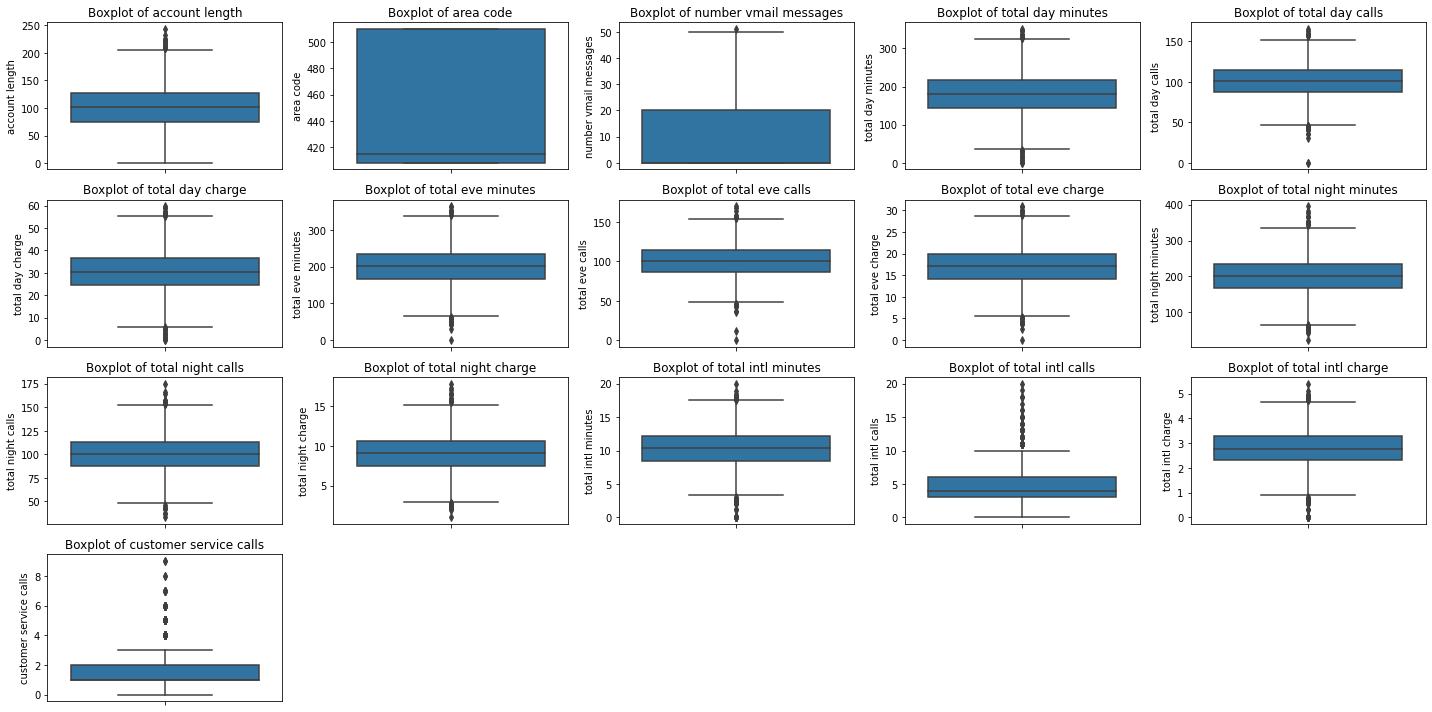

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


# Selecting numerical columns (excluding 'object' type columns)
numerical = df.select_dtypes(exclude='object').columns

# If 'churn' is a numerical column, drop it from the list
if 'churn' in numerical:
    numerical = numerical[numerical != 'churn']  # Exclude 'churn' from numerical columns

# Plot for numerical columns
plt.figure(figsize=(20, 10))

# Loop over numerical columns
for i, col in enumerate(numerical):
    plt.subplot(4, 5, i + 1)  # Create subplots (4 rows, 5 columns)
    sns.boxplot(data=df, y=col)  # Plot a boxplot for each numerical column
    plt.title(f'Boxplot of {col}')  # Set title for each plot

# Adjust layout to avoid overlap and show the plots
plt.tight_layout()
plt.show()


In [27]:
# handling outlier
def remove_outliers(df, numerical):
    for col in numerical:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5* IQR
        upper_bound = Q3 - 1.5*IQR

        df_cleaned = df[(df[numerical] >= lower_bound) & (df[numerical] <= upper_bound)]
    return df_cleaned

    
 

In [28]:
plt.figure(figsize=(20, 10))


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [29]:
for col in numerical:
    data = remove_outliers(df, numerical)

print("Outliers have been removed.")

Outliers have been removed.


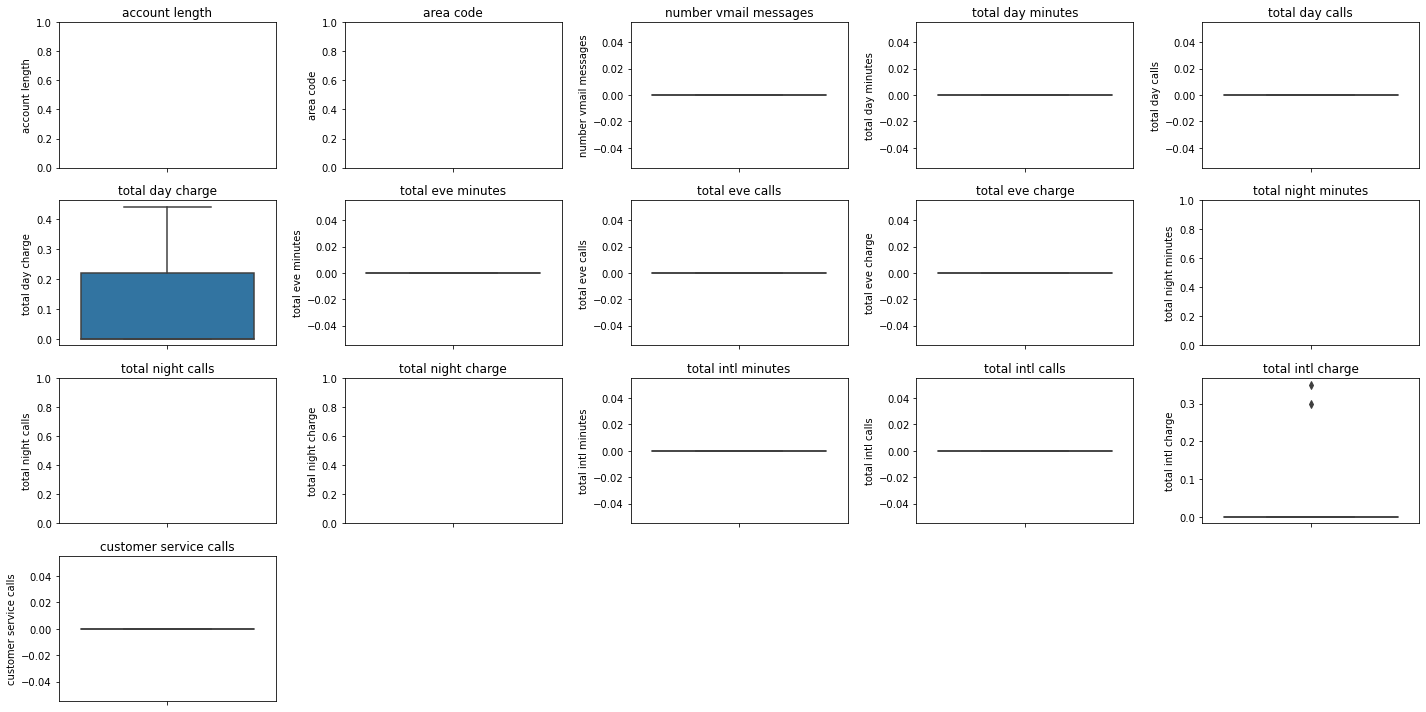

In [30]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(data=data, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

In [31]:
numerical= df.select_dtypes(exclude='object').columns
numerical

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [32]:
columns = ['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge']

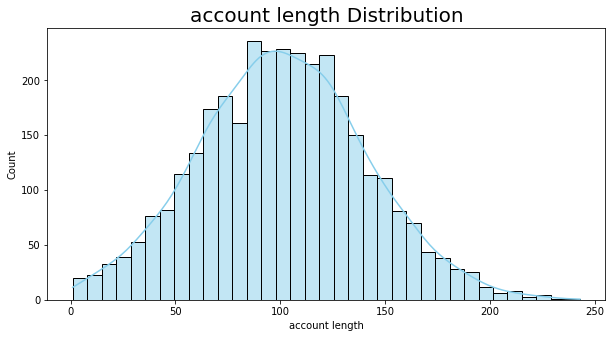

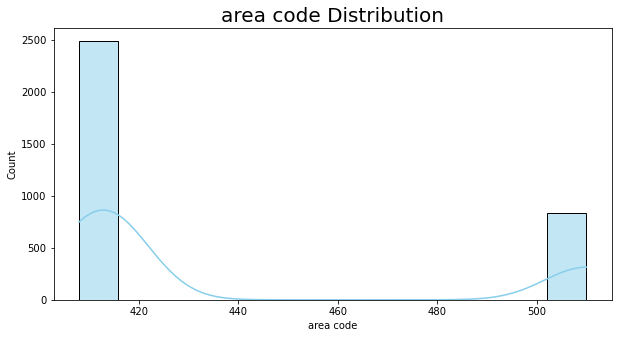

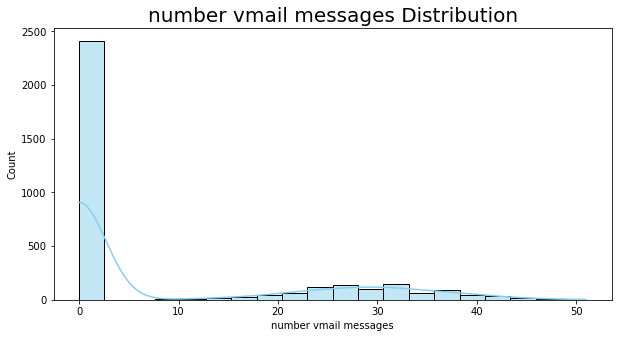

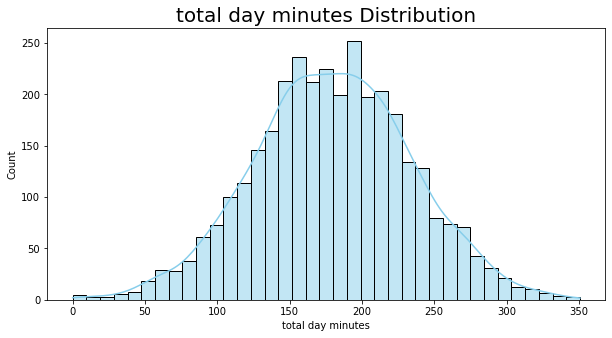

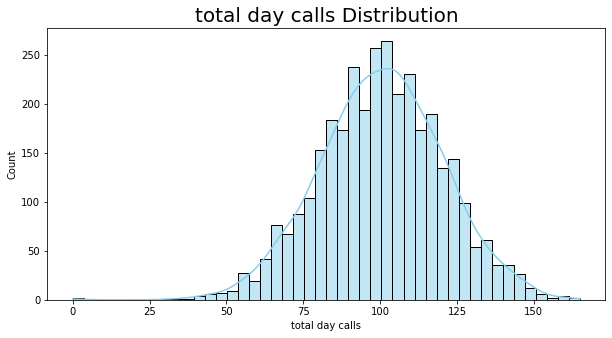

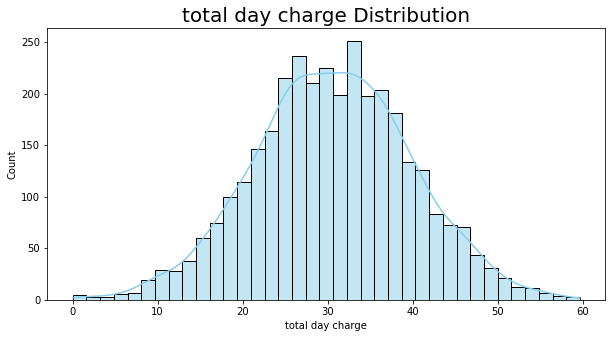

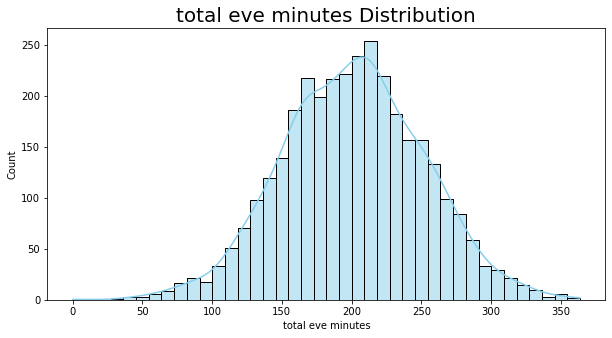

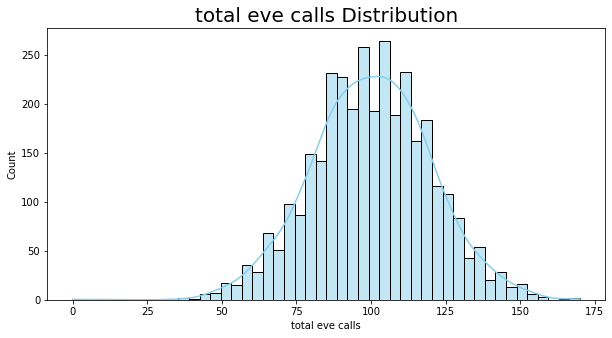

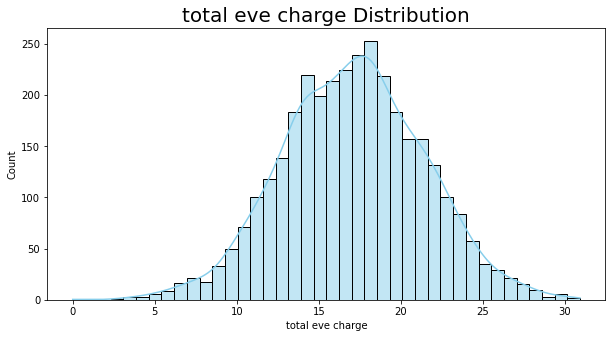

In [33]:

for feature in columns:
    plt.figure(figsize=(10,5),facecolor='w')
    sns.histplot(df[feature],color='skyblue',bins='auto',kde=True)
    plt.title(f'{feature} Distribution',fontsize=20)
    plt.show()

MUltvariate analysis.

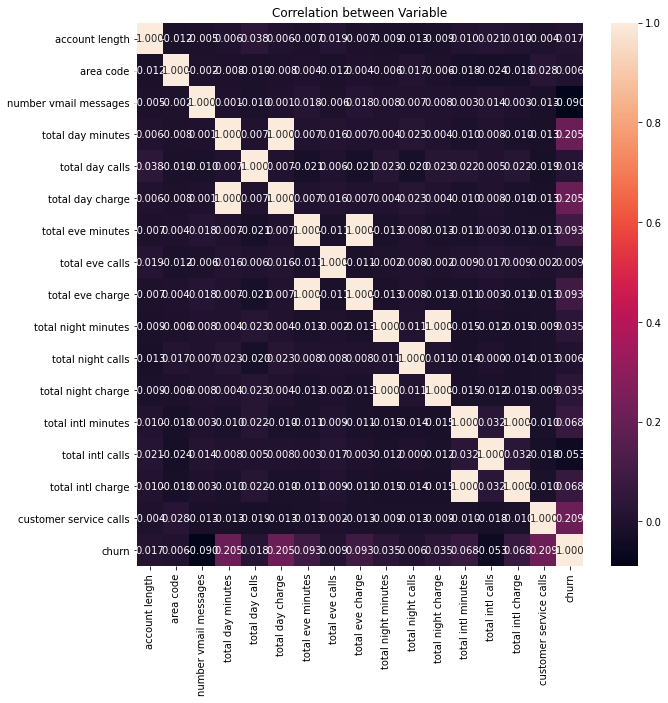

In [36]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,ax=ax,fmt='.3f')
plt.title('Correlation between Variable')
plt.show()  

In [ ]:
df.to_csv("cleaned_data.csv",index=False)